In [1]:
import pandas as pd
import pandas_profiling as pp
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import tkinter
import seaborn as sns

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [2]:
data = pd.read_csv("data/concrete-compressive-strength-data-set/compresive_strength_concrete.csv")

In [3]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [6]:
 data.columns = ['Cement', 'Blast_Furnance_Slag','Fly_Ash','Water','Superplasticizer','Coarse_Aggregate','Fine_Aggregate', 'Age', 'Strength']

In [7]:
data.describe()

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
pp.ProfileReport(data)

C:\Users\Antarika Baruah\Anaconda3\envs\Tensorflow-py3.7\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,9
Number of observations,1030
Total Missing (%),0.0%
Total size in memory,72.5 KiB
Average record size in memory,72.1 B
Numeric,9
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


### Data Analysis
- no null value
- no.of features are not more
- no.of examples are less. [SVM can work here]
- all the features are numeric in nature.
- features are not normalized.
- Age, Cement and SuperPlastilizer affect the strength in positive way. [based on the correlation diagram]
- Water affect the Strength in negative way. [based on the correlation diagram]

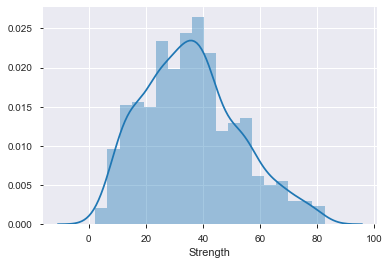

In [9]:
%matplotlib inline
sns.distplot(data['Strength']);

In [10]:
## to have the nultu class classification devide the strength in buckets 
bins=[0,20,40,60, 100]
labels=[0,1,2,3]
data['Strength_Cat']=pd.cut(data['Strength'],bins=bins,labels=labels)

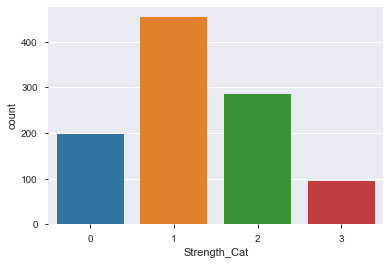

In [11]:
sns.countplot(x="Strength_Cat", data=data)

### Data Preprocessing
- shuffle the data.
- extract the features
- extract label for regression.
- extract the label for classification.
- split the data for training and validation.
- normalized the features.

In [12]:
## Since strength is continous integer value also , we will analyse both classification and regression algorithm in the dataset.
features = ['Cement', 'Blast_Furnance_Slag','Fly_Ash','Water','Superplasticizer','Coarse_Aggregate','Fine_Aggregate', 'Age']
cat_label = ['Strength_Cat']
reg_label = ['Strength']

data = shuffle(data)
X = data[features]
y_cat = data[cat_label]
y_reg = data[reg_label]

In [13]:

X_train_c, X_val_c, y_train_c, y_val_c = train_test_split(X, y_cat, test_size=0.20, random_state=42)
X_train_r, X_val_r, y_train_r, y_val_r = train_test_split(X, y_reg, test_size=0.20, random_state=42)    

In [14]:
### we have not override the value of X_train_c to compare the effect of normalization on State Vector Machine
scaler = StandardScaler()
X_train_c_n = scaler.fit_transform(X_train_c)
X_val_c_n = scaler.transform(X_val_c)
###################################

scaler = StandardScaler()
X_train_r_n = scaler.fit_transform(X_train_r)
X_val_r_n = scaler.transform(X_val_r)

## State Vector Machine - Classification


In [15]:
print('Training Feature Shape', X_train_c_n.shape)
print('Validation Feature Shape', X_val_c_n.shape)

print('Label Shape', y_train_c.shape)
print('Label Shape', y_val_c.shape)

Training Feature Shape (824, 8)
Validation Feature Shape (206, 8)
Label Shape (824, 1)
Label Shape (206, 1)


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [17]:
model = SVC()
param = {
    'kernel':['rbf'],
    'C':[1,3, 5, 7],
    'coef0':[0.000,0.001, 0.01,0.1]
}

In [18]:
%%time
gsc = GridSearchCV(
        estimator=model,
        param_grid=param,
        cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
grid_result = gsc.fit(X_train_c, y_train_c)
print('Best Param', grid_result.best_params_)

C:\Users\Antarika Baruah\Anaconda3\envs\Tensorflow-py3.7\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Antarika Baruah\Anaconda3\envs\Tensorflow-py3.7\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Best Param {'C': 3, 'coef0': 0.0, 'kernel': 'rbf'}
Wall time: 7.6 s


In [19]:
y_pred_c = grid_result.best_estimator_.predict(X_val_c)

In [20]:
print(y_pred_c.shape)
print('Accuracy', accuracy_score(y_val_c, y_pred_c))
print("classification Report:\n",classification_report(y_val_c,y_pred_c))
print('Confusion Matrix \n' , confusion_matrix(y_val_c, y_pred_c))

(206,)
Accuracy 0.5728155339805825
classification Report:
               precision    recall  f1-score   support

           0       1.00      0.28      0.43        36
           1       0.51      1.00      0.68        92
           2       0.92      0.18      0.30        61
           3       1.00      0.29      0.45        17

    accuracy                           0.57       206
   macro avg       0.86      0.44      0.47       206
weighted avg       0.76      0.57      0.51       206

Confusion Matrix 
 [[10 26  0  0]
 [ 0 92  0  0]
 [ 0 50 11  0]
 [ 0 11  1  5]]


In [21]:
model = SVC()
param = {
    'kernel':['rbf', 'sigmoid', 'poly'],
    'degree':[2,3],
    'C':[15, 17, 20, 22],
    'coef0':[0.000,0.001, 0.01,0.1, 1]
}

In [22]:
%%time
gsc = GridSearchCV(
        estimator=model,
        param_grid=param,
        cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
grid_result = gsc.fit(X_train_c_n, y_train_c)
print('Best Param', grid_result.best_params_)

Best Param {'C': 15, 'coef0': 1, 'degree': 3, 'kernel': 'poly'}
Wall time: 11.1 s


C:\Users\Antarika Baruah\Anaconda3\envs\Tensorflow-py3.7\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Antarika Baruah\Anaconda3\envs\Tensorflow-py3.7\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
y_pred_c = grid_result.best_estimator_.predict(X_val_c_n)

In [24]:
print(y_pred_c.shape)
print('Accuracy', accuracy_score(y_val_c, y_pred_c))
print("classification Report:\n",classification_report(y_val_c,y_pred_c))
print('Confusion Matrix \n' , confusion_matrix(y_val_c, y_pred_c))

(206,)
Accuracy 0.8155339805825242
classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85        36
           1       0.81      0.83      0.82        92
           2       0.77      0.79      0.78        61
           3       1.00      0.76      0.87        17

    accuracy                           0.82       206
   macro avg       0.86      0.81      0.83       206
weighted avg       0.82      0.82      0.82       206

Confusion Matrix 
 [[31  5  0  0]
 [ 6 76 10  0]
 [ 0 13 48  0]
 [ 0  0  4 13]]


### SVC Model Analysis

- normalization had not much impact on the execution time of the algo, but it had great effect on the accuracy of the model
- execution was fast.
- accuracy is around 80%, best model was found using the grid search.
- Class 2 is more confued with class 1 rather than class 3.
- Similarly Class 1 is more confused with 